# Руководство по визуализации данных в Python

Этот ноутбук представляет собой комплексное и углубленное руководство по визуализации данных в Python. Мы начнем с самых быстрых способов построения графиков для разведочного анализа с помощью `pandas`, затем перейдем к `matplotlib` для получения полного контроля над каждым элементом визуализации и, наконец, изучим `seaborn` для создания сложных и эстетически привлекательных статистических графиков.

### План занятия:
1.  [**Часть 1: Быстрый старт с Pandas**](#part1)
    *   *Цель:* Научиться быстро строить базовые графики для разведочного анализа данных (EDA) прямо из DataFrame.
    *   Линейные графики, столбчатые диаграммы, гистограммы, Box Plot, Area Plot, Scatter Plot, Pie Plot.

2.  [**Часть 2: Полный контроль с Matplotlib**](#part2)
    *   *Цель:* Понять фундаментальные принципы `matplotlib` и научиться настраивать каждый аспект графика для публикаций или сложных отчетов.
    *   Архитектура: `Figure` и `Axes`, объектно-ориентированный подход.
    *   Создание сложных макетов с `Subplots` и `GridSpec`.
    *   Аннотации: как рассказать историю с помощью данных.

3.  [**Часть 3: Статистическая красота с Seaborn**](#part3)
    *   *Цель:* Освоить `seaborn` для быстрого построения сложных статистических визуализаций, которые было бы трудоемко делать в `matplotlib`.
    *   Визуализация распределений: `histplot`, `kdeplot`.
    *   Анализ зависимостей: `scatterplot`, `regplot`, `jointplot`.
    *   Работа с категориальными данными: `boxplot`, `violinplot`, `swarmplot`, `countplot`.
    *   Комплексные визуализации: `pairplot`, `heatmap`, `FacetGrid`.

4.  [**Часть 4: Теория и лучшие практики**](#part4)
    *   *Цель:* Научиться создавать не просто красивые, а эффективные и честные визуализации.
    *   Принципы Эдварда Тафти, графическая целостность и психология цвета.

5.  [**Часть 5: Бонус — Автоматический EDA**](#part5)
    *   *Цель:* Познакомиться с инструментом для автоматического создания отчетов о данных.


In [1]:
# --- Импорт библиотек ---
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# --- Глобальные настройки для улучшения вида графиков ---

# Устанавливаем стиль seaborn по умолчанию для всех графиков — это сразу делает их красивее!
# "whitegrid" добавляет белую подложку с серыми горизонтальными линиями.
sns.set_theme(style="whitegrid")

# Устанавливаем глобальные параметры для matplotlib, чтобы графики были крупнее и читабельнее
plt.rcParams.update({
    'font.size': 14,             # Размер шрифта по умолчанию
    'figure.figsize': (10, 6),   # Размер фигуры (графика) в дюймах
    'axes.labelsize': 14,        # Размер подписей осей
    'xtick.labelsize': 12,       # Размер подписей на оси X
    'ytick.labelsize': 12,       # Размер подписей на оси Y
    'legend.fontsize': 12        # Размер шрифта в легенде
})

# Игнорируем будущие предупреждения от библиотек, чтобы не загромождать вывод
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<a id="part1"></a>
## Часть 1: Быстрый старт с Pandas

`pandas` предоставляет встроенные методы для визуализации, которые являются удобной "оберткой" над `matplotlib`. Это идеальный инструмент, чтобы быстро взглянуть на данные, не выходя из привычной среды `pandas`.

**Основная идея:** к любому `Series` или `DataFrame` можно применить метод `.plot()` и указать тип графика через параметр `kind`.


In [2]:
# Загрузим основной датасет для этой части
df_beauty = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv', sep=';')
df_beauty.head()


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


### Линейный график (`kind='line'`)
**Вопрос:** Как изменялась величина с течением времени?

Идеально подходит для временных рядов или любых данных, где важен порядок.


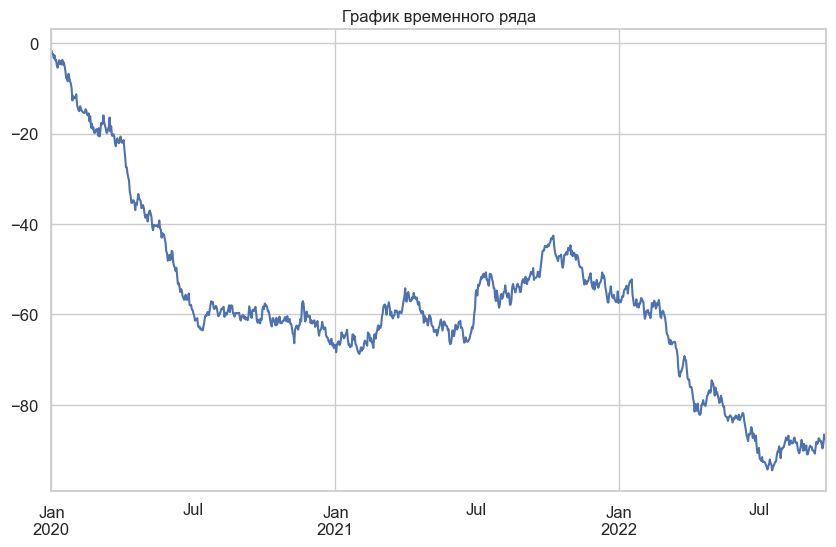

In [3]:
# Создаем временной ряд: 1000 случайных шагов
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000))
# .cumsum() вычисляет накопленную сумму, создавая "случайное блуждание"
ts = ts.cumsum()
# .plot() по умолчанию строит линейный график (kind='line')
ts.plot(title='График временного ряда');


**Вывод:** Линейный график наглядно показывает тренды, сезонность и аномалии в данных, упорядоченных по времени или другой непрерывной переменной.

### Столбчатая диаграмма (`kind='bar'` или `kind='barh'`)
**Вопрос:** Как соотносятся значения между разными категориями?

Отлично подходит для сравнения средних значений, подсчета количества и т.д.


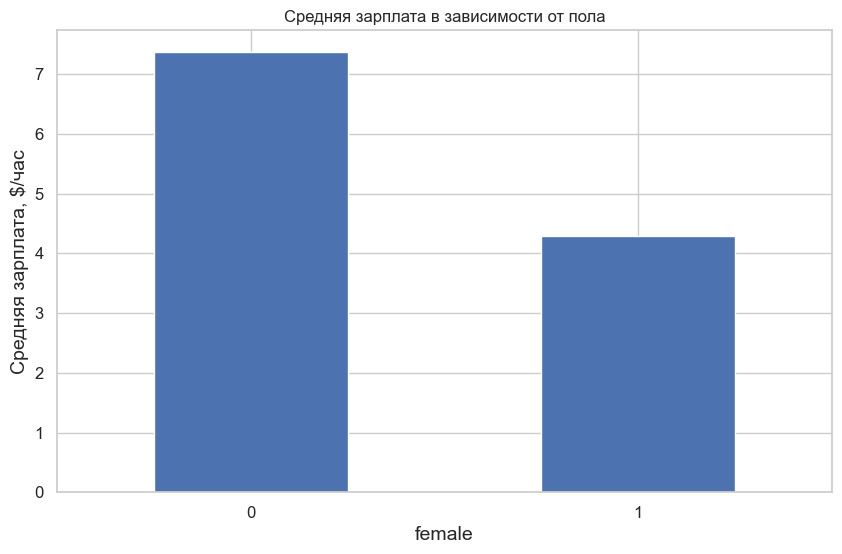

In [4]:
# 1. Группируем данные по полу ('female') и считаем среднюю зарплату ('wage') для каждой группы
female_wage = df_beauty.groupby('female')['wage'].mean()

# 2. Строим график
female_wage.plot(
    kind='bar',  # тип графика: столбчатая диаграмма
    title='Средняя зарплата в зависимости от пола',
    rot=0        # rot=0 - не поворачивать подписи на оси X
)
plt.ylabel('Средняя зарплата, $/час'); # Добавляем подпись к оси Y для понятности


**Вывод:** График четко показывает разрыв в оплате труда. Категория `0` (мужчины) имеет в среднем более высокую зарплату, чем категория `1` (женщины).

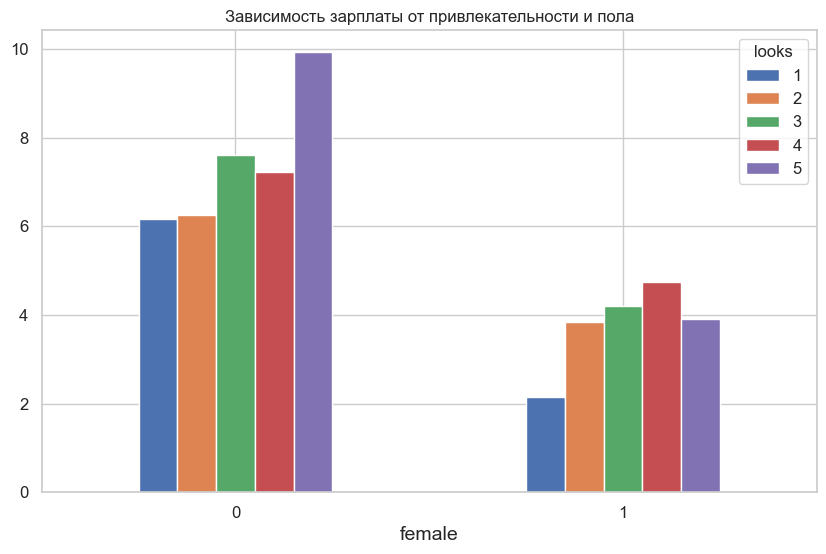

In [5]:
# Можно сравнивать и по нескольким категориям.
# Сначала группируем по полу и привлекательности, затем .unstack() преобразует данные в удобный для построения вид
looks_wage = df_beauty.groupby(['female','looks'])['wage'].mean().unstack()

# Строим сгруппированную столбчатую диаграмму
looks_wage.plot(kind='bar', title='Зависимость зарплаты от привлекательности и пола', rot=0);


**Вывод:** Этот более детальный график показывает, что разрыв в зарплате между мужчинами и женщинами сохраняется на всех уровнях привлекательности. Также видно, что для обеих групп более высокая оценка привлекательности (`looks`) коррелирует с более высокой средней зарплатой.

### Гистограмма (`kind='hist'`)
**Вопрос:** Каково распределение числовой переменной? Где сосредоточено большинство значений?

Показывает, как часто встречаются те или иные значения в наборе данных.


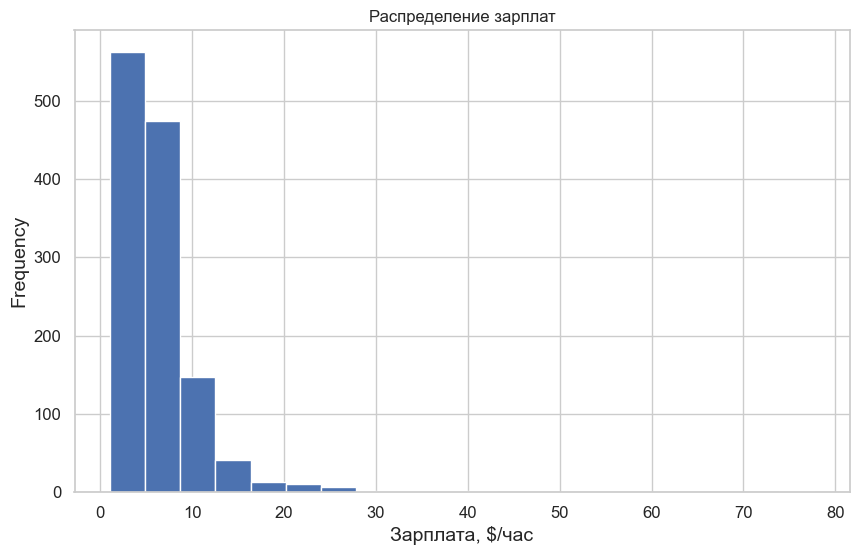

In [6]:
df_beauty['wage'].plot(
    kind='hist', # тип графика: гистограмма
    bins=20,     # количество "корзин" (столбцов), на которые разбиваются данные
    title='Распределение зарплат'
)
plt.xlabel('Зарплата, $/час');


**Вывод:** Распределение зарплат смещено вправо (positive skew). Это означает, что большинство людей получают относительно невысокую зарплату, но есть небольшой "хвост" из людей с очень высокими зарплатами.

### Box Plot (`kind='box'`)
**Вопрос:** Как распределены данные в разных группах? Есть ли выбросы?

Очень информативный график, показывающий медиану (линия в ящике), межквартильный размах (сам ящик), "усы" (обычно 1.5 * межквартильный размах) и выбросы (точки за усами).


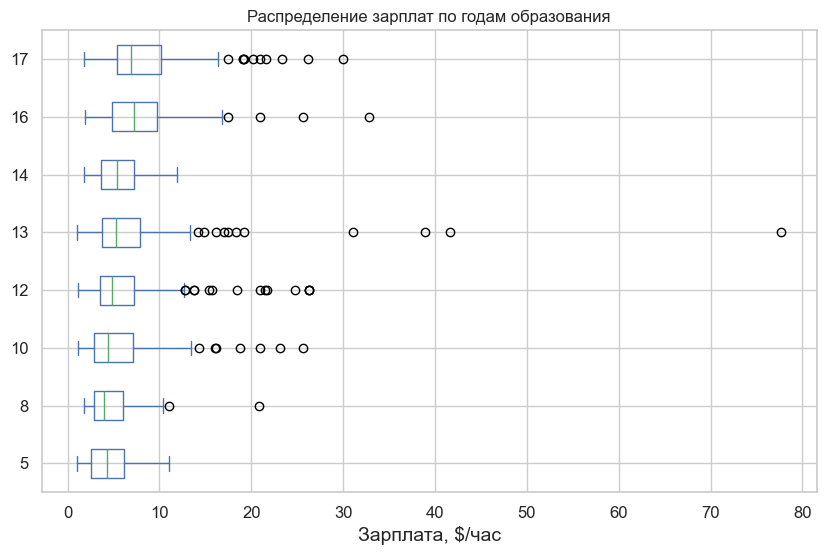

In [7]:
# Для pandas.plot.box() данные нужно привести в "широкий" формат, где каждая колонка - это отдельная группа
# .pivot_table() отлично для этого подходит
educ_wage = df_beauty.pivot_table(index=df_beauty.index, columns='educ', values='wage')

# Строим график
educ_wage.plot(
    kind='box',      # тип графика: коробчатая диаграмма
    vert=False,      # vert=False - расположить ящики горизонтально для лучшей читаемости
    title='Распределение зарплат по годам образования'
)
plt.xlabel('Зарплата, $/час');


**Вывод:** График наглядно демонстрирует положительную связь между уровнем образования и зарплатой. С увеличением количества лет образования (`educ`) растут как медианная зарплата, так и общий разброс зарплат.

### Диаграмма рассеяния (`kind='scatter'`)
**Вопрос:** Есть ли связь между двумя числовыми переменными?

Помогает увидеть корреляцию, кластеры и выбросы в данных.


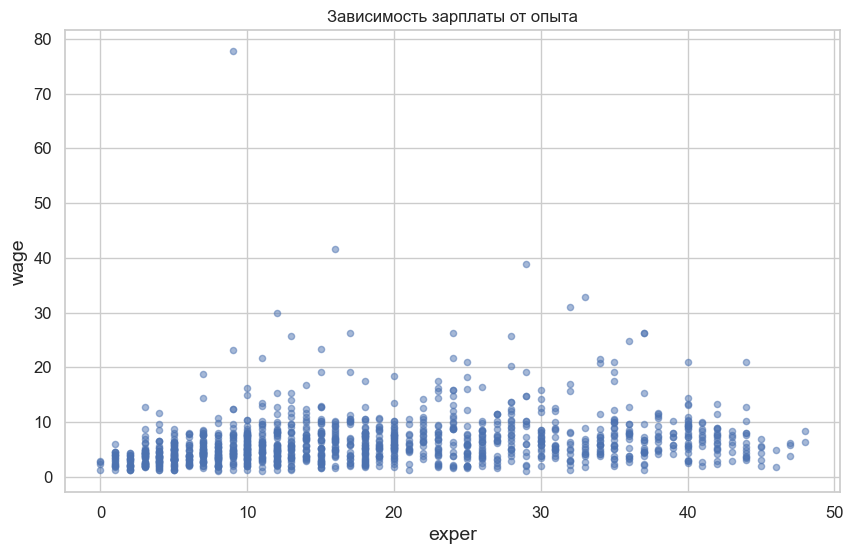

In [8]:
df_beauty.plot(
    kind='scatter', # тип графика: диаграмма рассеяния
    x='exper',      # переменная для оси X
    y='wage',       # переменная для оси Y
    alpha=0.5,      # alpha - прозрачность точек, помогает увидеть их плотность
    title='Зависимость зарплаты от опыта'
);


**Вывод:** Наблюдается слабая положительная тенденция: с ростом опыта (`exper`) зарплата (`wage`) в среднем немного увеличивается. Однако разброс значений очень большой, что говорит о том, что опыт — далеко не единственный фактор, влияющий на зарплату.

<a id="part2"></a>
## Часть 2: Полный контроль с Matplotlib

`pandas.plot()` — это удобно, но для тонкой настройки (например, для научной статьи) нужен полный контроль. Здесь на сцену выходит `matplotlib`.

**Ключевая концепция: связываем Pandas и Matplotlib**

Любой вызов `pandas.plot()` возвращает объект `Axes` из `matplotlib`. Это позволяет нам сначала быстро построить график, а потом донастроить его с помощью мощных инструментов `matplotlib`.


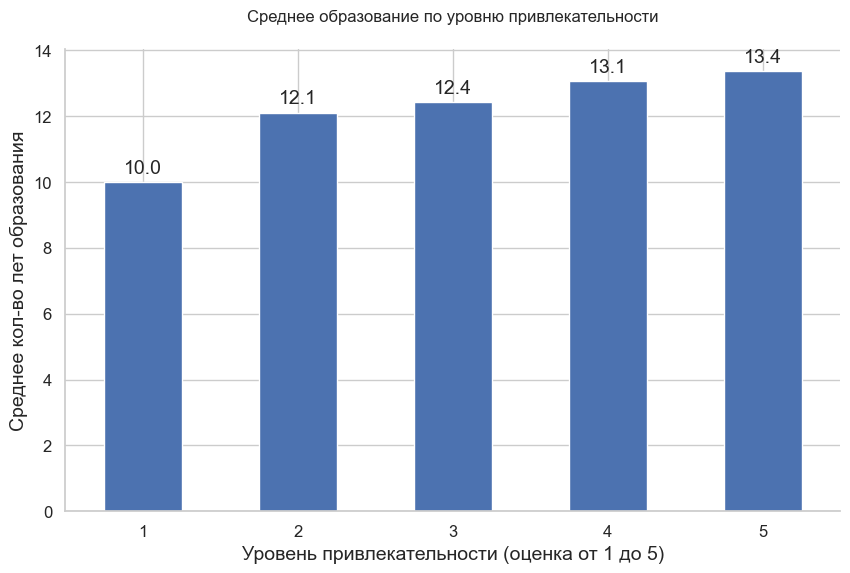

In [9]:
# --- Шаг 1: Строим базовый график с помощью pandas ---
# .plot() возвращает объект осей (Axes), который мы сохраняем в переменную `ax`
ax = df_beauty.groupby('looks')['educ'].mean().plot(kind='bar', rot=0)

# --- Шаг 2: `ax` - это объект Matplotlib! Теперь мы можем его настраивать. ---

# Устанавливаем более информативные заголовок и подписи осей
ax.set_title('Среднее образование по уровню привлекательности', pad=20)
ax.set_xlabel('Уровень привлекательности (оценка от 1 до 5)')
ax.set_ylabel('Среднее кол-во лет образования')

# Убираем лишние рамки (spines) для чистоты и минимализма
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Шаг 3: Добавляем аннотации (продвинутая настройка) ---
# Проходимся по каждому столбцу (прямоугольнику) на графике
for p in ax.patches:
    # ax.annotate() добавляет текст на график
    ax.annotate(
        f'{p.get_height():.1f}',                                   # Текст для аннотации (высота столбца, округленная до 1 знака)
        (p.get_x() + p.get_width() / 2., p.get_height()),          # Координаты (x, y), где будет аннотация (верхняя центральная точка столбца)
        ha='center', va='center',                                 # Выравнивание текста по горизонтали и вертикали
        xytext=(0, 10),                                           # Смещение текста на 10 пунктов вверх
        textcoords='offset points'                                # Система координат для смещения
    )


**Вывод:** Мы взяли простой график из `pandas` и превратили его в информативную, готовую к презентации визуализацию, добавив подписи данных и улучшив оформление с помощью `matplotlib`.

### Архитектура Matplotlib: `Figure` и `Axes` (Объектно-ориентированный подход)

Это самый важный и правильный способ работы с `matplotlib` для сложных задач.

*   **`Figure`** — это весь холст, на котором вы рисуете. Он может содержать один или несколько графиков.
*   **`Axes`** — это отдельный график (система координат) на холсте. У него есть свои оси X и Y, заголовок и т.д.

Лучшая практика — всегда начинать с создания `Figure` и `Axes` через `plt.subplots()`.

<img src='https://matplotlib.org/stable/_images/anatomy.png' width='700'>


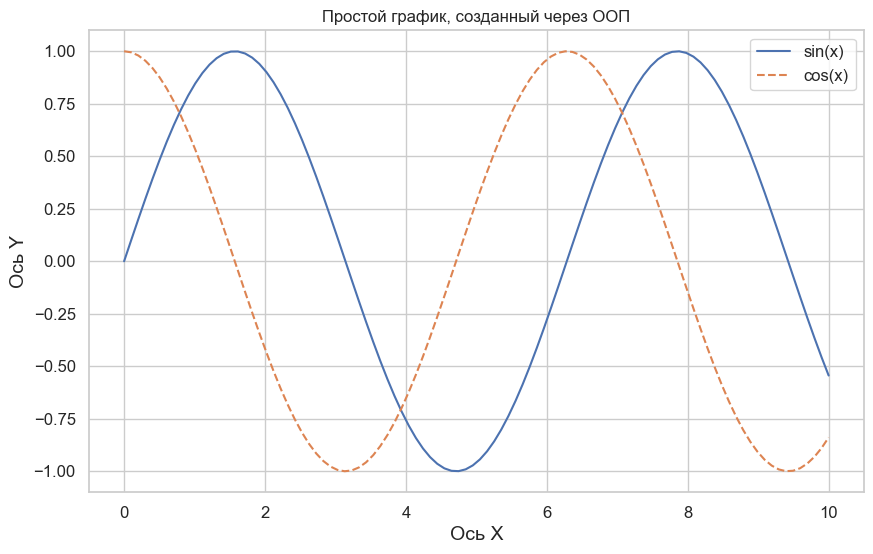

In [10]:
# Создаем фигуру (fig) и одни оси (ax) на ней
# figsize задает размер фигуры в дюймах
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 10, 100)

# Рисуем на объекте ax, а не через глобальный plt
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), linestyle='--', label='cos(x)') # linestyle задает стиль линии

# Настраиваем график через методы объекта ax (set_title, set_xlabel и т.д.)
ax.set_title("Простой график, созданный через ООП")
ax.set_xlabel("Ось X")
ax.set_ylabel("Ось Y")
ax.legend(); # Показывает легенду


### Сложные макеты: `subplots` и `GridSpec`

`plt.subplots(rows, cols)` позволяет легко создавать сетку из графиков.


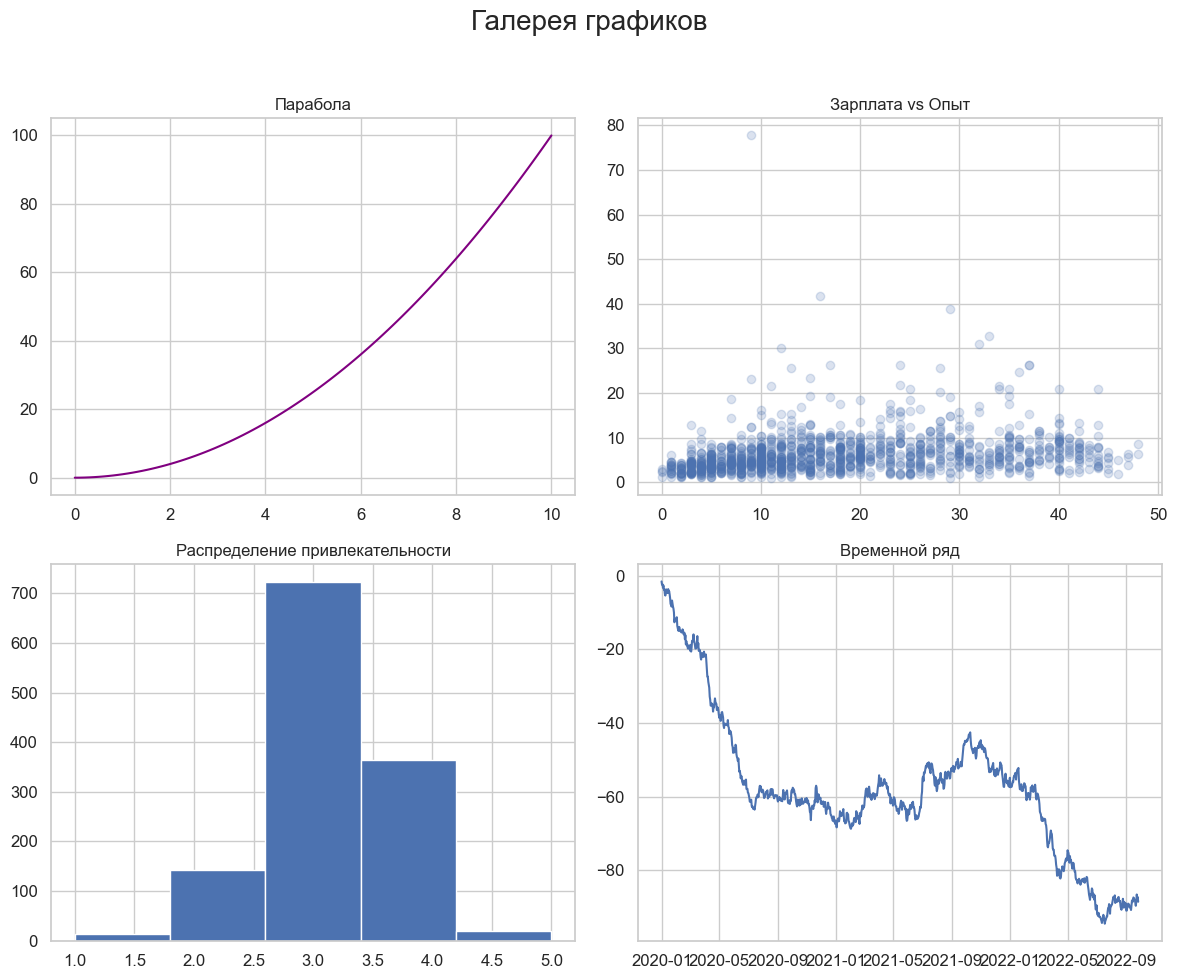

In [11]:
# Создаем сетку 2x2. `axes` будет 2D-массивом NumPy, который можно индексировать
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# fig.suptitle() добавляет общий заголовок для всей фигуры
fig.suptitle('Галерея графиков', fontsize=20)

# Заполняем каждый из 4-х графиков
axes[0, 0].plot(x, x**2, color='purple')
axes[0, 0].set_title('Парабола')

axes[0, 1].scatter(df_beauty['exper'], df_beauty['wage'], alpha=0.2)
axes[0, 1].set_title('Зарплата vs Опыт')

axes[1, 0].hist(df_beauty['looks'], bins=5)
axes[1, 0].set_title('Распределение привлекательности')

axes[1, 1].plot(ts)
axes[1, 1].set_title('Временной ряд')

# plt.tight_layout() автоматически корректирует отступы, чтобы элементы не накладывались
# rect=[0, 0, 1, 0.96] оставляет место для suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])


Для еще более сложных макетов, где графики занимают несколько ячеек, используется `GridSpec`.


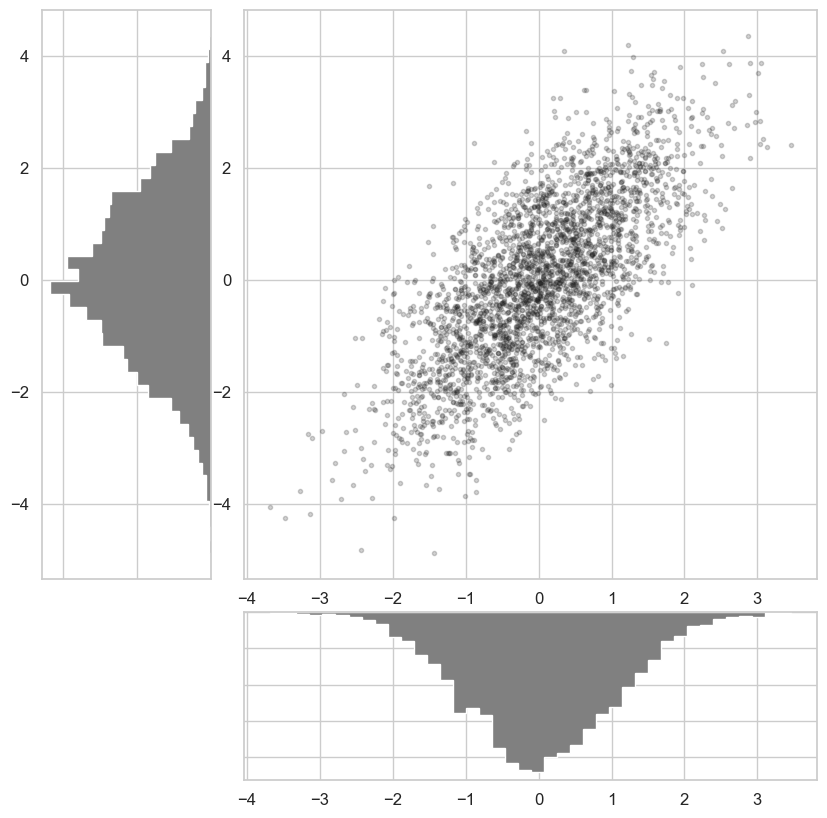

In [12]:
# Генерируем данные для примера
x_rand, y_rand = np.random.multivariate_normal([0, 0], [[1, 1], [1, 2]], 3000).T

# 1. Создаем фигуру
fig = plt.figure(figsize=(10, 10))
# 2. Создаем "сетку" 4x4, на которой будем размещать графики
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

# 3. Размещаем графики на сетке, используя срезы Python
main_ax = fig.add_subplot(grid[:-1, 1:])  # Основной график занимает верхнюю правую часть 3x3
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax) # Гистограмма Y слева
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax) # Гистограмма X снизу

# 4. Рисуем на каждом из созданных `Axes`
# Основная диаграмма рассеяния
main_ax.plot(x_rand, y_rand, 'ok', markersize=3, alpha=0.2)

# Гистограммы
x_hist.hist(x_rand, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis() # Переворачиваем ось, чтобы гистограмма "росла" вниз

y_hist.hist(y_rand, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis() # Переворачиваем ось, чтобы гистограмма "росла" влево


### Аннотации: рассказываем историю

Хороший график не просто показывает данные, он акцентирует внимание на важных моментах.


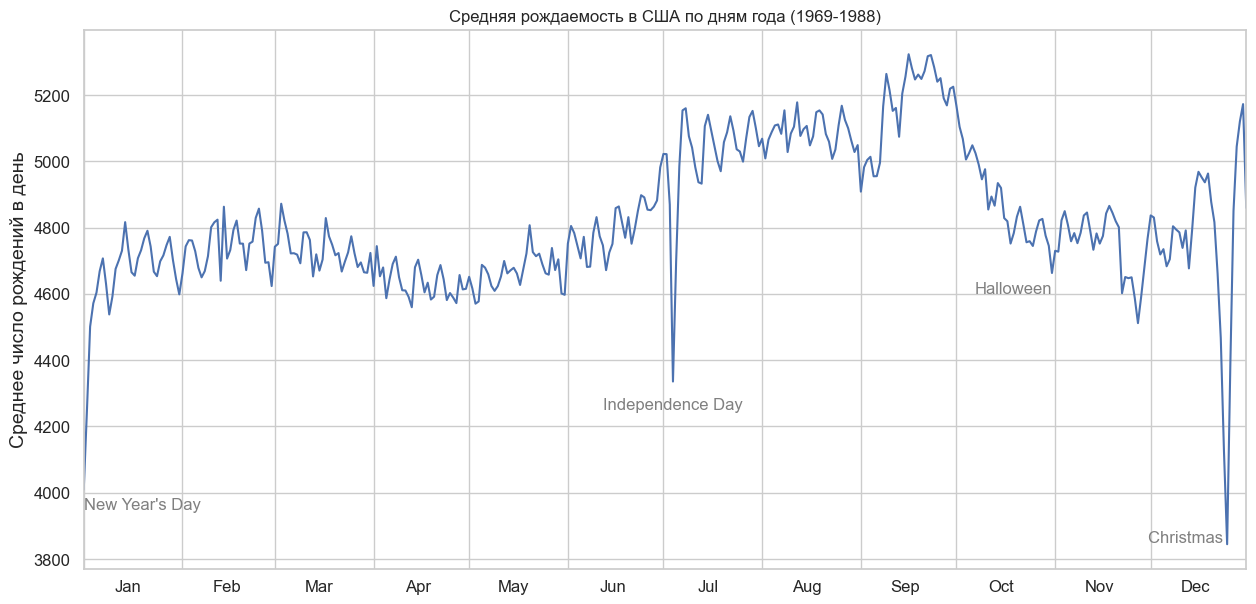

In [13]:
# Загрузим данные. Блок try-except нужен, чтобы сначала попытаться загрузить локальный файл,
# а если его нет - скачать из интернета.
try:
    births = pd.read_csv('births.csv')
except FileNotFoundError:
    # ИСПРАВЛЕННАЯ ССЫЛКА
    url = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv'
    births = pd.read_csv(url)

# Подготовка данных
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.to_datetime(f'2012-{month:02d}-{day:02d}') for (month, day) in births_by_date.index]

# Построение графика
fig, ax = plt.subplots(figsize=(15, 7))
births_by_date.plot(ax=ax, legend=False)

# Добавление аннотаций для выделения праздников
style = dict(size=12, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Настройка осей и заголовка
ax.set(title='Средняя рождаемость в США по дням года (1969-1988)', ylabel='Среднее число рождений в день')
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));


**Вывод:** `GridSpec` предоставляет максимальную гибкость для создания сложных, многокомпонентных визуализаций, которые часто встречаются в научных публикациях.

<a id="part3"></a>
## Часть 3: Статистическая красота с Seaborn

`matplotlib` — мощный, но часто многословный. `seaborn` построен поверх `matplotlib` и предоставляет высокоуровневый интерфейс для создания сложных и красивых **статистических** графиков.

**Ключевая идея:** `seaborn` лучше всего работает с "длинными" (tidy) DataFrame, где каждая строка — это наблюдение, а каждый столбец — переменная.


In [14]:
# Загрузим датасеты, встроенные в seaborn, они уже в "длинном" формате
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')


### 1. Визуализация распределений

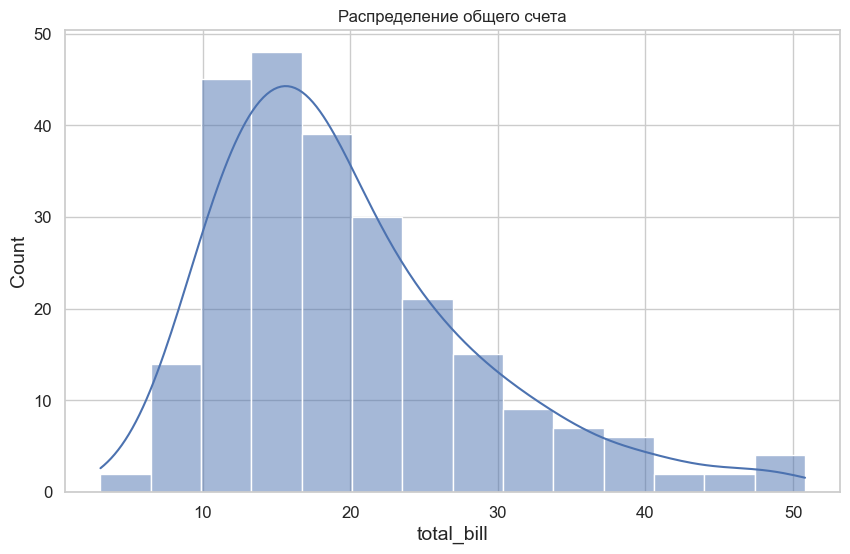

In [15]:
# histplot — это улучшенная гистограмма.
sns.histplot(
    data=tips,      # DataFrame
    x='total_bill', # Столбец для построения
    kde=True        # kde=True - добавляет линию оценки плотности вероятности (Kernel Density Estimate)
)
plt.title('Распределение общего счета');


**Вывод:** График показывает распределение общего счета. KDE-кривая помогает лучше увидеть его форму (смещенную вправо), чем простая гистограмма.

### 2. Анализ зависимостей

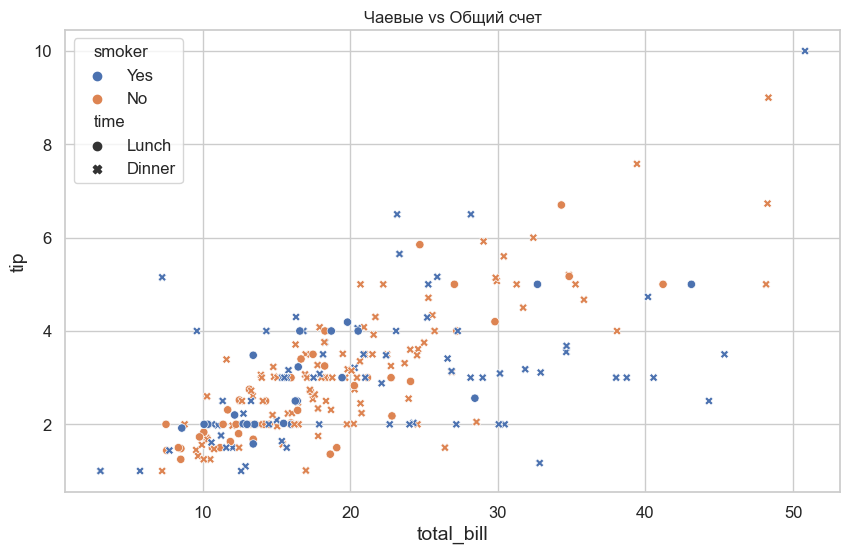

In [16]:
# scatterplot — диаграмма рассеяния, но с очень удобными параметрами для добавления измерений
sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',   # hue - цвет точек зависит от категориальной переменной 'smoker'
    style='time'    # style - форма маркера зависит от 'time'
)
plt.title('Чаевые vs Общий счет');


**Вывод:** С помощью `hue` и `style` мы можем анализировать 4 переменные одновременно на 2D-графике! Мы видим общую положительную связь между счетом и чаевыми, а также можем заметить, есть ли разница в поведении курящих/некурящих в обед и на ужин.

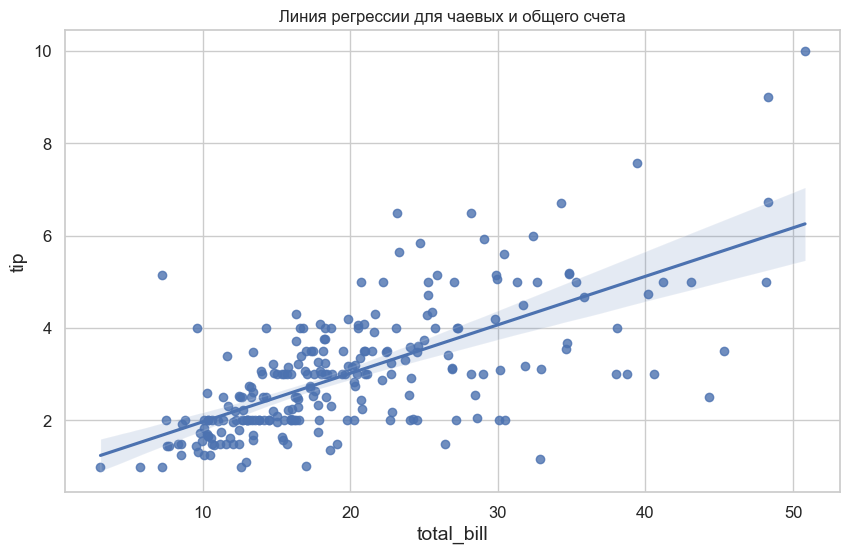

In [17]:
# regplot — диаграмма рассеяния с автоматически построенной линией регрессии и доверительным интервалом
sns.regplot(data=tips, x='total_bill', y='tip')
plt.title('Линия регрессии для чаевых и общего счета');


**Вывод:** Линия регрессии подтверждает положительную связь. Закрашенная область — это 95% доверительный интервал для линии регрессии. Он показывает, что для больших счетов неопределенность в предсказании чаевых возрастает.

### 3. Работа с категориальными данными (сильнейшая сторона `seaborn`)

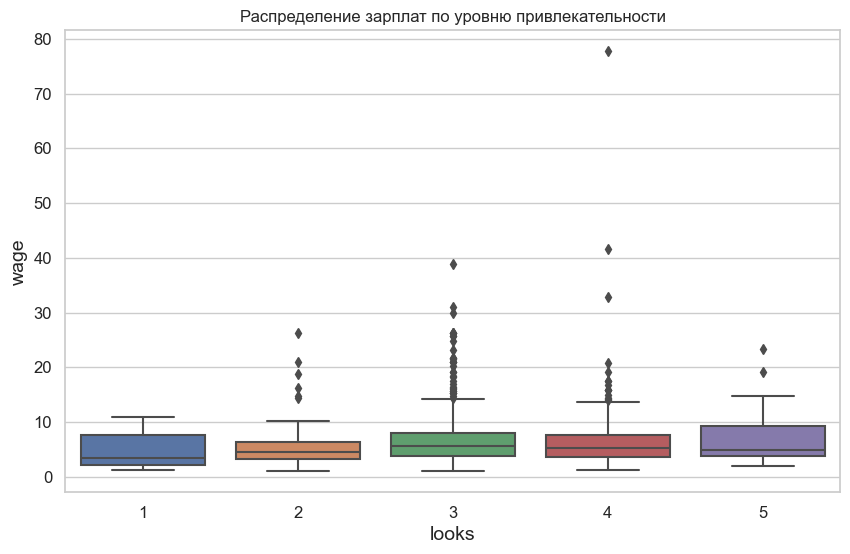

In [18]:
# Вспомним boxplot. В seaborn он строится в одну строку без предобработки данных!
sns.boxplot(data=df_beauty, x='looks', y='wage')
plt.title('Распределение зарплат по уровню привлекательности');


**Вывод:** В отличие от `pandas`, `seaborn` не требует преобразовывать данные в "широкий" формат, что делает код намного проще и интуитивнее.

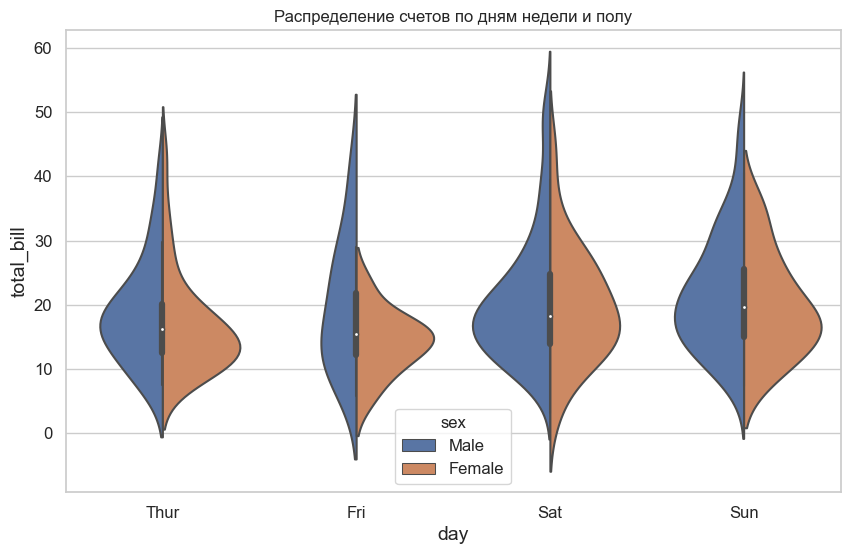

In [19]:
# violinplot — комбинация boxplot (внутри) и KDE (по бокам). Показывает форму распределения.
sns.violinplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',       # hue - разделяет скрипки по полу
    split=True       # split=True - объединяет скрипки для 'male' и 'female' в одну для прямого сравнения
)
plt.title('Распределение счетов по дням недели и полу');


**Вывод:** `violinplot` дает больше информации, чем `boxplot`. Например, мы видим, что в субботу у мужчин распределение счетов имеет два "пика" (бимодальное), что не видно на обычном boxplot.

### 4. Комплексные визуализации на основе сеток

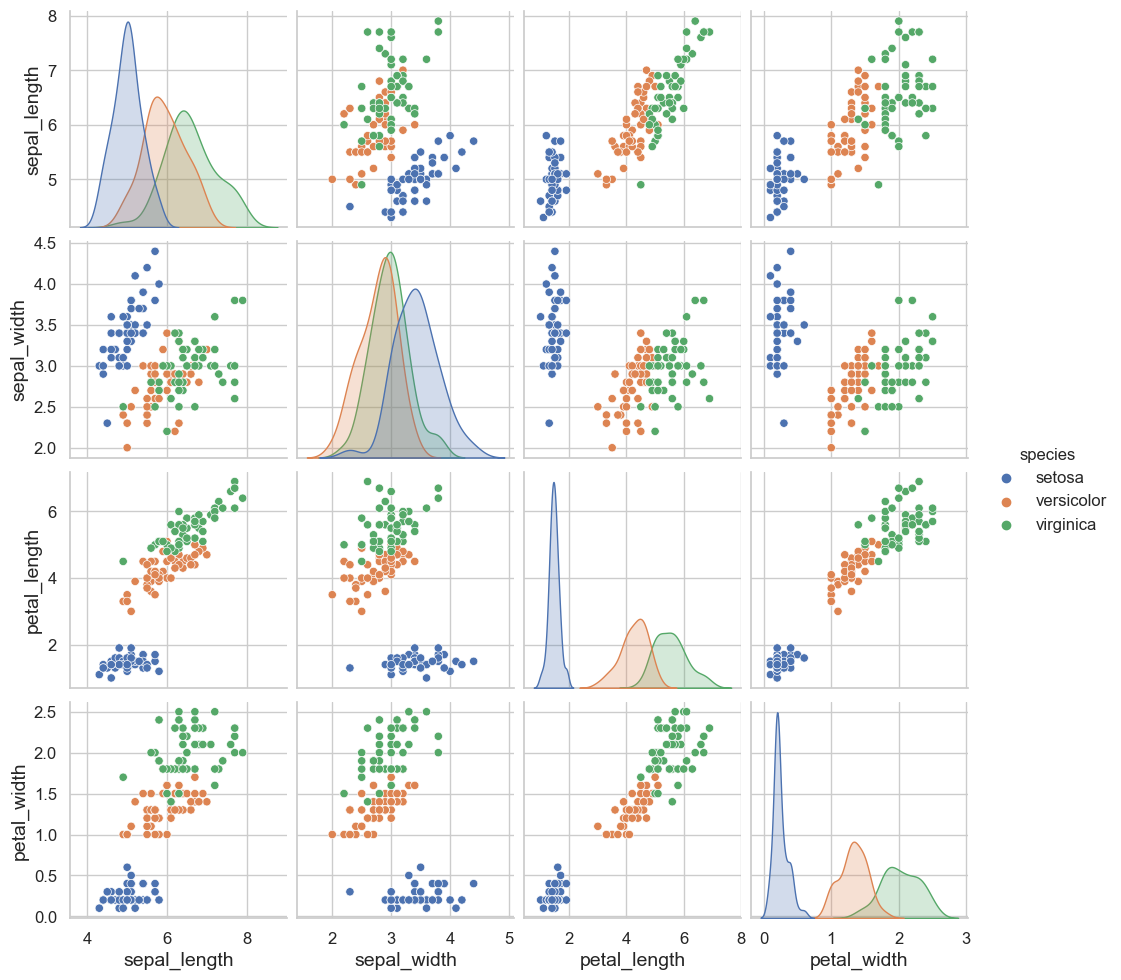

In [20]:
# pairplot — строит диаграммы рассеяния для всех пар переменных и гистограммы на диагонали.
# Незаменимый инструмент для первого взгляда на данные!
sns.pairplot(
    iris,
    hue='species' # Раскрашивает точки в зависимости от вида цветка
);


**Вывод:** `pairplot` — это мощнейший инструмент EDA. За одну команду мы получаем полное представление о взаимосвязях в данных. Например, из графика видно, что переменные `petal_length` и `petal_width` идеально разделяют три вида ирисов.

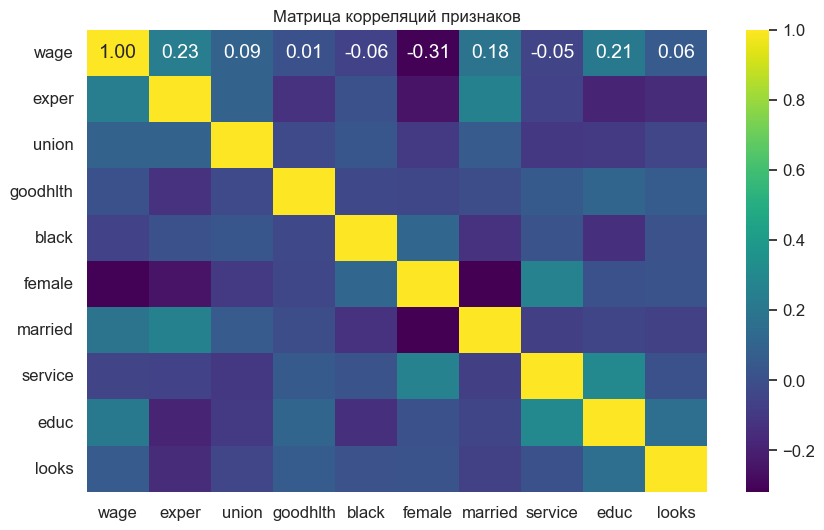

In [21]:
# heatmap — идеален для визуализации матриц, например, матрицы корреляций.
corr_matrix = df_beauty.select_dtypes(include=np.number).corr()
sns.heatmap(
    corr_matrix,
    annot=True,     # annot=True - подписать значения в ячейках
    cmap='viridis', # cmap - цветовая карта
    fmt='.2f'       # fmt='.2f' - формат чисел (2 знака после запятой)
)
plt.title('Матрица корреляций признаков');


**Вывод:** Тепловая карта позволяет мгновенно находить сильные и слабые корреляции. Светлые ячейки указывают на сильную положительную корреляцию (например, между `wage` и `educ`), а темные — на слабую или отрицательную.

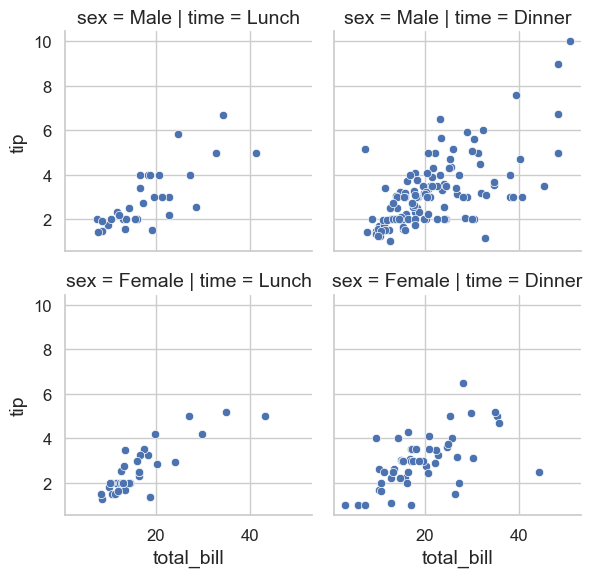

In [22]:
# FacetGrid — мощный инструмент для создания сетки графиков по подгруппам данных.
# 1. Создаем сетку, указывая, какие переменные будут определять строки и столбцы
g = sns.FacetGrid(tips, col="time", row="sex")
# 2. "Наносим" (map) на каждую ячейку сетки нужный тип графика
g.map(sns.scatterplot, "total_bill", "tip")
# 3. Добавляем легенду, если нужно
g.add_legend();


**Вывод:** `FacetGrid` позволяет разбить сложный набор данных на простые для понимания подгруппы и сравнить зависимости внутри каждой из них. Это один из самых мощных инструментов для исследования сложных взаимодействий в данных.

<a id="part4"></a>
## Часть 4: Теория и лучшие практики

**"Цель визуализации — дать озарение, а не просто сделать картинку" — Бен Шнейдерман**


### Принципы дизайна Эдварда Тафти
*   **Соотношение "данные-чернила" (Data-Ink Ratio):** Максимизируйте долю "чернил", используемых для отображения данных. Убирайте всё лишнее: ненужные сетки, рамки, фон.
*   **Графический мусор (Chartjunk):** Избегайте бессмысленных украшательств: 3D-эффектов, градиентов, теней, которые не несут информации и только отвлекают.

### Графическая целостность
*   **Масштабы:** Ось Y не всегда должна начинаться с нуля, но её усечение может драматически исказить восприятие. Используйте это честно и осознанно.
*   **"Фактор лжи"**: Визуальное изменение на графике должно быть пропорционально изменению в данных.

### Психология цвета
*   **Последовательные (Sequential) палитры:** Для данных, идущих от низкого к высокому (например, `viridis`, `plasma`).
*   **Расходящиеся (Diverging) палитры:** Для данных, у которых есть значимый центр (например, 0). Идеальны для матриц корреляций (`coolwarm`, `RdBu`).
*   **Качественные (Qualitative) палитры:** Для разделения категорий, не имеющих порядка (`tab10`, `Set3`).
*   **Доступность:** Помните о людях с нарушениями цветового зрения. Используйте палитры, которые хорошо читаются (например, `viridis`, `cividis`).


<a id="part5"></a>
## Часть 5: Бонус — Автоматический EDA с ydata-profiling

Иногда, прежде чем строить графики вручную, хочется получить быстрый обзор всех данных. `ydata-profiling` (бывший `pandas-profiling`) генерирует подробный интерактивный HTML-отчет о датасете.


In [23]:
# Если библиотека не установлена, раскомментируйте и выполните:
# !pip install ydata-profiling


In [24]:
from ydata_profiling import ProfileReport

# Ограничимся первыми 500 строками для скорости
profile = ProfileReport(df_beauty.head(500), title="Отчет по датасету 'Beauty'")
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.58it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
## Заключение и что дальше?

Мы рассмотрели три основных кита визуализации в Python:

| Библиотека      | Сильные стороны                                         | Когда использовать?                                                              |
|-----------------|---------------------------------------------------------|----------------------------------------------------------------------------------|
| **Pandas.plot** | Простота, скорость, интеграция с DataFrame              | Для самого первого, быстрого взгляда на данные, базового EDA.                    |
| **Matplotlib**  | Полный контроль, гибкость, стандарт де-факто            | Для кастомных, сложных графиков, подготовки изображений к публикации, тонкой настройки. |
| **Seaborn**     | Статистическая направленность, красота, работа с категориями | Для сложных статистических графиков, сравнения групп, быстрого создания красивых визуализаций. |

**Для интерактивных дашбордов и веб-визуализаций** стоит изучить такие библиотеки, как `Plotly`, `Bokeh` и `Altair`.
